In [2]:
import pandas as pd
import numpy as np
from path import Path
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def get_file_list(dir_path):
    imgs = Path(dir_path).files('*.png')
    imgs += Path(dir_path).files('*.jpg')
    imgs += Path(dir_path).files('*.jpeg')
    
    return imgs

In [4]:
df_karin = pd.read_csv('./csv/omlette_rice_karin.csv')
df_taiga = pd.read_csv('./csv/omlette_rice_taiga.csv')
df_kyohei = pd.read_csv('./csv/omlette_rice_kyohei.csv')
df_nakahira = pd.read_csv('./csv/omlette_rice_nakahira.csv')
df_wakawo = pd.read_csv('./csv/omlette_rice_wakawo.csv')

df_all = pd.DataFrame()
df_all['filename'] = df_karin['filename']
df_all['score'] = [0 for _ in range(len(df_all))]
for df_tmp in [df_karin, df_taiga, df_kyohei, df_nakahira, df_wakawo]:
    df_all['score'] = df_all['score'] + df_tmp['score']
df_all['score'] = df_all['score'] / 5

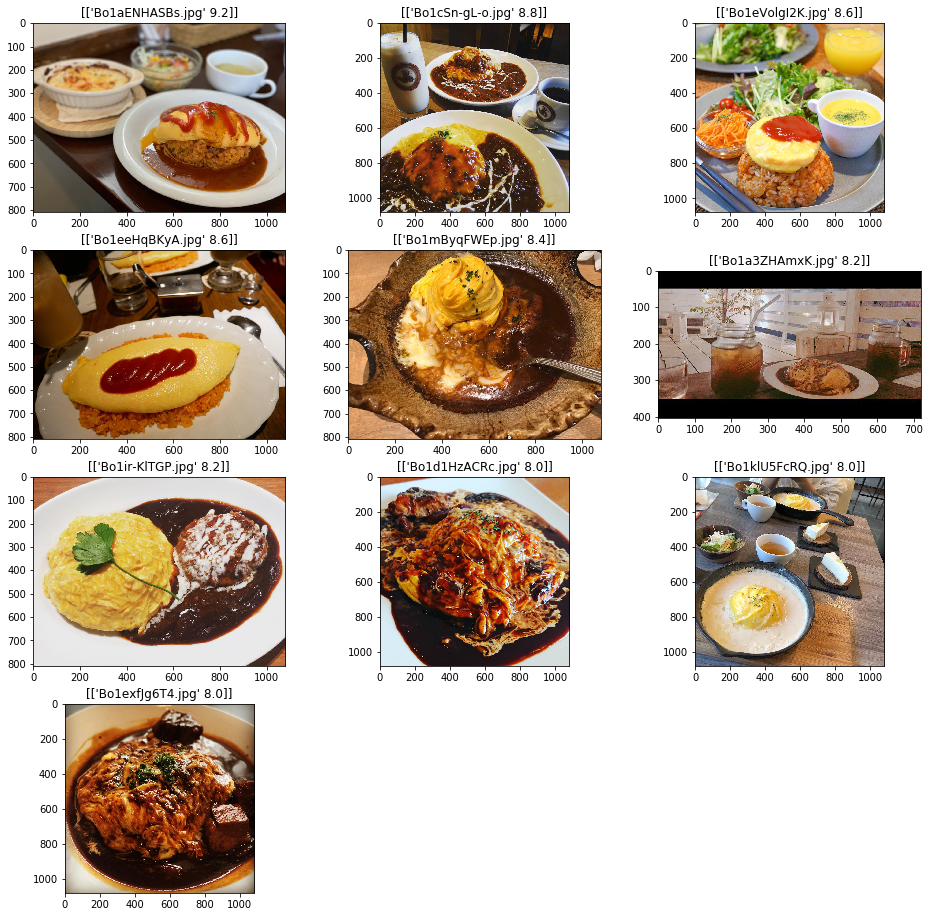

In [5]:
top10 = df_all.sort_values(by=['score'], ascending=False)['filename'][:10].values

fig = plt.figure(figsize=(16, 16))
for i, fn in enumerate(top10):
    image = Image.open(Path("../images/omelette_rice/omelette_rice/"+str(fn)))
    fig.add_subplot(4, 3, i+1)
    plt.imshow(image)
    plt.title(df_all[df_all['filename']==fn].values)
plt.show()

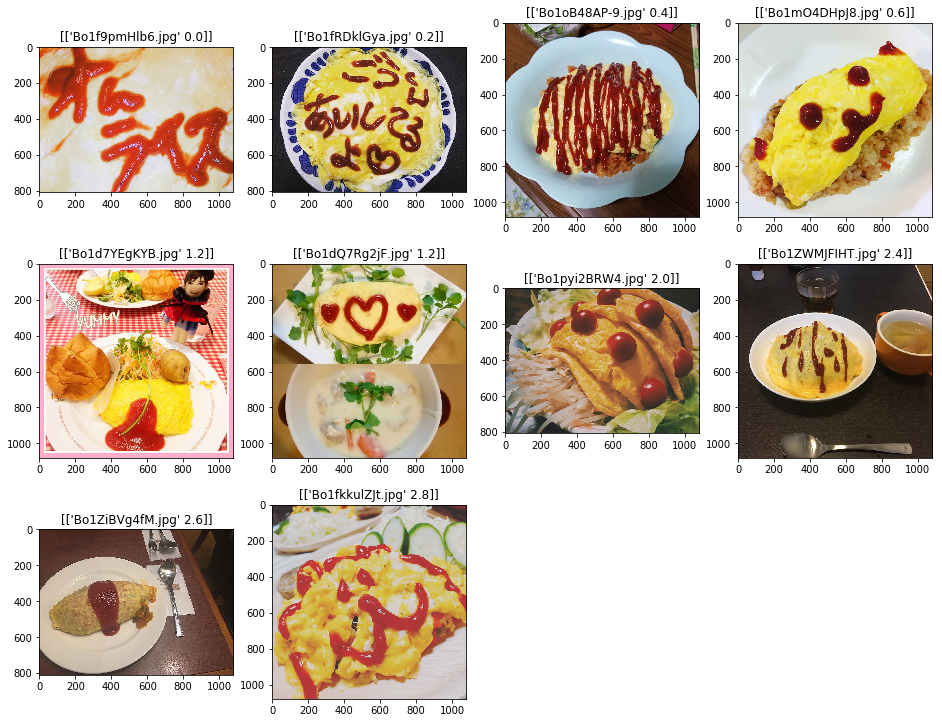

In [6]:
bottom10 = df_all.sort_values(by=['score'])['filename'][:10].values

fig = plt.figure(figsize=(16, 17))
for i, fn in enumerate(bottom10):
    image = Image.open(Path("../images/omelette_rice/omelette_rice/"+str(fn)))
    fig.add_subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(df_all[df_all['filename']==fn].values)
plt.show()

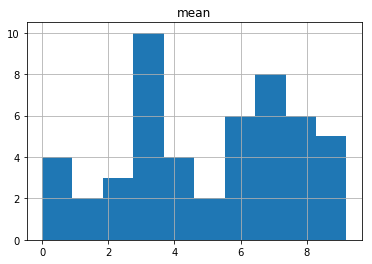

In [7]:
# 平均
df_all['score'].hist()
plt.title('mean')
plt.show()

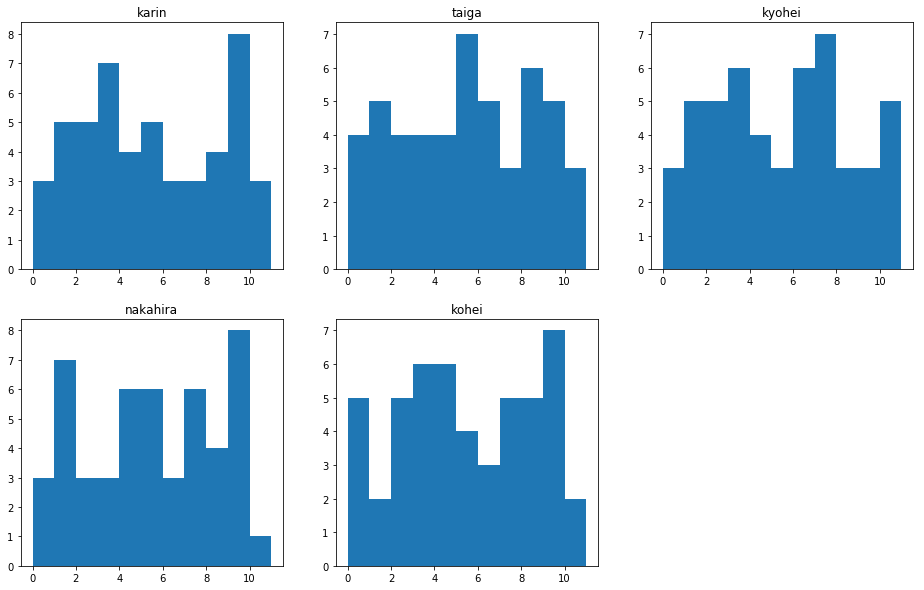

In [15]:
# それぞれ
fig = plt.figure(figsize=(16, 10))
df_list = [df_karin, df_taiga, df_kyohei, df_nakahira, df_wakawo]
raters = ['karin', 'taiga', 'kyohei', 'nakahira', 'kohei']

for i, (df_tmp, rater) in enumerate(zip(df_list, raters)):
    fig.add_subplot(2, 3, i+1)
    plt.title(rater)
    plt.hist(df_tmp['score'].values, list(range(0, 12, 1)))
plt.show()